In [164]:
#Import libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
import json
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [100]:
restaurant_reviews_df = pd.read_pickle("../restaurant_reviews_df")
restaurants_df = pd.read_pickle('../restaurants_df')

In [165]:
restaurant_reviews_df['date'] = pd.to_datetime(restaurant_reviews_df['date'], infer_datetime_format=True)

In [166]:
restaurant_reviews_df.dtypes

review_id               object
user_id                 object
business_id             object
stars_x                float64
useful                   int64
funny                    int64
cool                     int64
text                    object
date            datetime64[ns]
name                    object
address                 object
city                    object
state                   object
postal_code             object
latitude               float64
longitude              float64
stars_y                float64
review_count           float64
is_open                float64
attributes              object
categories              object
hours                   object
dtype: object

In [167]:
restaurant_reviews_df.shape

(1326519, 22)

In [168]:
restaurant_reviews_df.isna().sum()

review_id           0
user_id             0
business_id         0
stars_x             0
useful              0
funny               0
cool                0
text                0
date                0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars_y             0
review_count        0
is_open             0
attributes       3127
categories          0
hours           80769
dtype: int64

In [169]:
restaurants_df.shape

(19456, 14)

In [170]:
restaurants_df.isna().sum()

business_id        0
name               0
address            0
city               0
state              0
postal_code        0
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes       618
categories         0
hours           4874
dtype: int64

In [171]:
toronto_rest = restaurants_df[restaurants_df['city']=='Toronto']

In [197]:
toronto_rest.shape

(2707, 14)

In [172]:
toronto_rest.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
38,rVBPQdeayMYht4Uv_FOLHg,Gourmet Burger Company,843 Kipling Avenue,Toronto,ON,M8Z 5G9,43.633291,-79.531768,3.0,13,0,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt...","Restaurants, Burgers, Food",None
277,d9A5lhFHOBvEw-BxSYnWOA,Song Cook's Corean Chilli,681 Bloor St W,Toronto,ON,M6G 1L3,43.663746,-79.416452,4.0,4,0,"{'HasTV': 'True', 'WiFi': 'u'no'', 'Restaurant...","Restaurants, Korean",None
327,37kk0IW6jL7ZlxZF6k2QBg,Edulis,169 Niagara Street,Toronto,ON,M5V,43.641948,-79.406580,4.0,115,1,"{'RestaurantsGoodForGroups': 'False', 'Restaur...","Restaurants, Spanish, French","{'Wednesday': '18:0-23:0', 'Thursday': '18:0-2..."
332,y1Er-SodAde9QZIcgFf45g,Blackod Steak and Fish House,3479 Yonge St,Toronto,ON,M4N 2N3,43.734367,-79.404422,2.0,8,0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...","Restaurants, Steakhouses, Seafood","{'Monday': '0:0-0:0', 'Tuesday': '17:0-21:0', ..."
354,0rMFhLzeq3Z2OaJ62MQXlw,Spiga Ristorante,1378 Yonge Street,Toronto,ON,M4T 1Y5,43.686247,-79.393561,4.0,14,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Italian",None


In [279]:
df = pd.Series(toronto_rest['categories']).str.get_dummies(',')

In [280]:
df.columns = df.columns.str.strip()
df.head()

,Acai Bowls,Active Life,Adult Entertainment,Afghan,African,American (New),American (Traditional),Arabian,Arcades,Argentine,Art Galleries,Arts & Crafts,Arts & Entertainment,Asian Fusion,Australian,Bagels,Bakeries,Bangladeshi,Barbeque,Bars,Beauty & Spas,Beer,Beer Bar,Belgian,Bistros,Bocce Ball,Books,Brasseries,Brazilian,Breakfast & Brunch,Breweries,Brewpubs,British,Bubble Tea,Buffets,Burgers,Butcher,Cafes,Cafeteria,Cajun/Creole,Cambodian,Canadian (New),Candy Stores,Cantonese,Cards & Stationery,Caribbean,Casinos,Caterers,Cheese Shops,Cheesesteaks,...,Religious Organizations,Russian,Salad,Salvadoran,Sandwiches,Scandinavian,Seafood,Seafood Markets,Shaved Snow,Shopping,Smokehouse,Soul Food,Soup,South African,Southern,Spanish,Specialty Food,Sports Bars,Sri Lankan,Stadiums & Arenas,Steakhouses,Street Vendors,Supper Clubs,Sushi Bars,Szechuan,Tacos,Taiwanese,Tapas Bars,Tapas/Small Plates,Tea Rooms,Team Building Activities,Tex-Mex,Thai,Themed Cafes,Turkish,Ukrainian,Vegan,Vegetarian,Venezuelan,Venues & Event Spaces,Vietnamese,Vinyl Records,Vitamins & Supplements,Waffles,Wigs,Wine & Spirits,Wine Bars,Women's Clothing,Wraps,Restaurants
38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
327,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


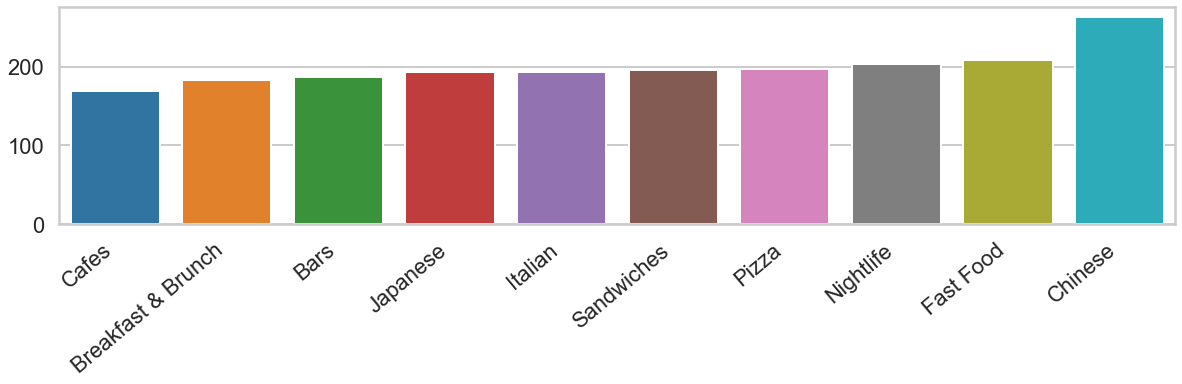

In [294]:
top_cats = df.sum().sort_values()[-12:-2]

plt.figure(figsize=(20,4))
ax = sns.barplot(top_cats.index,top_cats.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

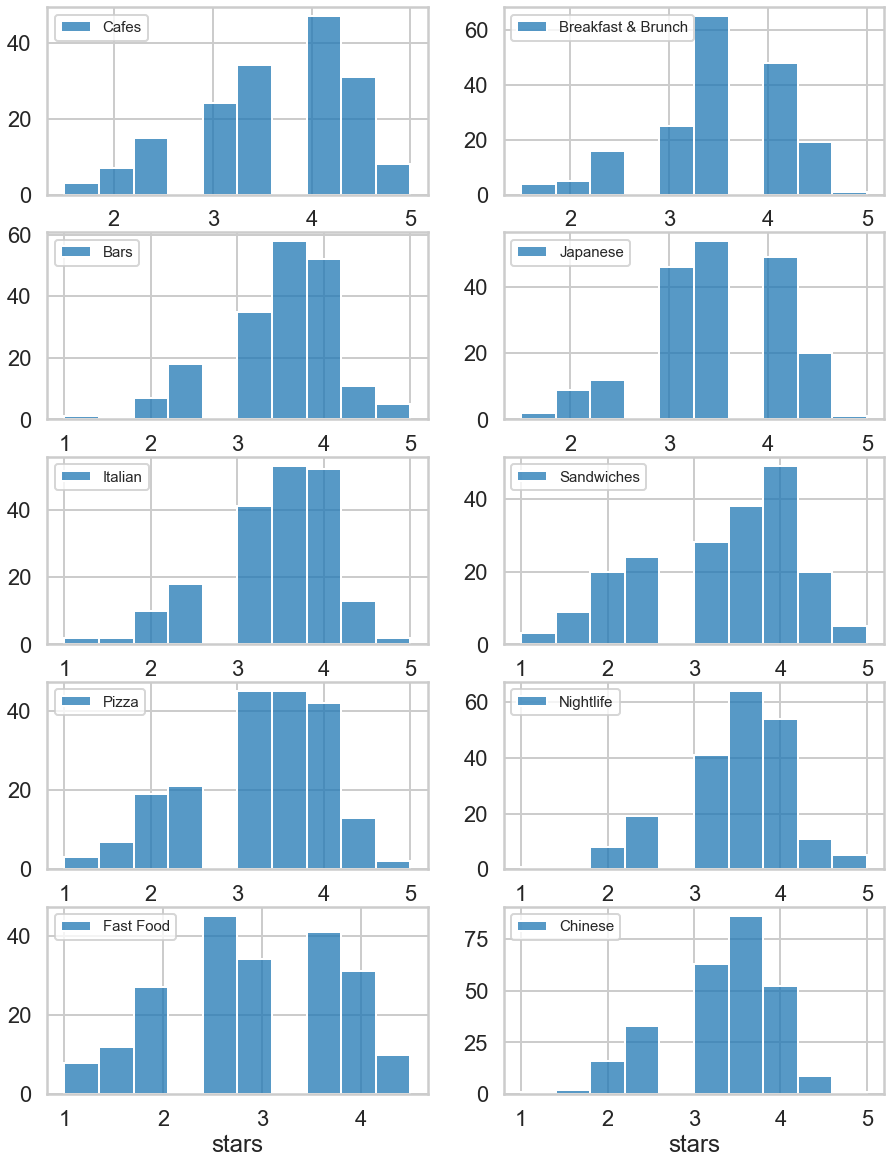

In [297]:
fig,axes = plt.subplots(nrows=5, ncols=2, figsize=(15,20))
axes = axes.flatten()
for i,x in enumerate(top_cats.index):

    sns.histplot(toronto_rest.loc[df[df[x]==1].index]['stars'],bins=10,legend=True,ax=axes[i],label=x)
    axes[i].set(xlabel='stars', ylabel='')
    axes[i].legend(loc="upper left",fontsize=15)



<AxesSubplot:xlabel='is_open', ylabel='Count'>

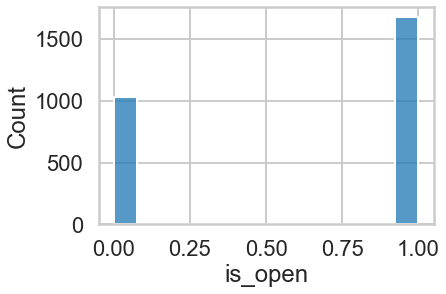

In [185]:
sns.histplot(toronto_rest['is_open'])

In [225]:
ratings = toronto_rest.groupby('stars').count()['review_count']
ratings

stars
1.0     14
1.5     47
2.0    159
2.5    268
3.0    517
3.5    744
4.0    655
4.5    267
5.0     36
Name: review_count, dtype: int64

<AxesSubplot:xlabel='stars'>

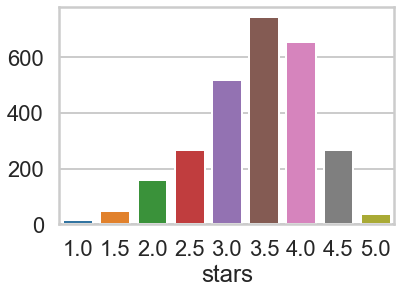

In [189]:
sns.barplot(ratings.index,ratings.values)

<AxesSubplot:xlabel='review_count', ylabel='Count'>

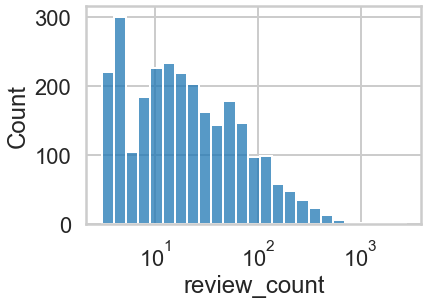

In [190]:
sns.histplot(toronto_rest['review_count'],log_scale=True)